In [1]:
import pandas as pd
import numpy as np

Our dataset is from: [https://www.kaggle.com/datasets/jackogozaly/data\-science\-and\-stem\-salaries?datasetId=1640011&sortBy=voteCount](https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries?datasetId=1640011&sortBy=voteCount)


In [2]:
df = pd.read_csv("Levels_Fyi_Salary_Data.csv")

In [3]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [4]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [5]:
df['company'].isnull().values.any()

True

In [6]:
df['company'].isnull().sum()

5

In [7]:
len(df)

62642

In [8]:
df['level'].isnull().values.any()

True

In [9]:
df['level'].isnull().sum()

119

In [10]:
df['tag'].isnull().values.any()

True

In [11]:
df['tag'].isnull().sum()

854

In [12]:
df['gender'].isnull().values.any()

True

In [13]:
df['gender'].isnull().sum()

19540

In [14]:
df['otherdetails'].isnull().values.any()

True

In [15]:
df['otherdetails'].isnull().sum()

22505

In [16]:
df['dmaid'].isnull().values.any()

True

In [17]:
df['dmaid'].isnull().sum()

2

In [18]:
df['Masters_Degree'].isnull().values.any()

False

In [19]:
df['Race'].isnull().values.any()

True

In [20]:
df['Race'].isnull().sum()

40215

In [21]:
df['Education'].isnull().values.any()

True

In [22]:
df['Education'].isnull().sum()

32272

In [23]:
df = df.drop(['Race','Education','otherdetails','level','tag','dmaid','cityid','timestamp','rowNumber'], axis = 1)

In [24]:
df = df[df['basesalary'] != 0.0]

In [25]:
df.head()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,20000.0,10000.0,NaN,0,0,0,0,0,0,0,0,0,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,180000.0,35000.0,NaN,0,0,0,0,0,0,0,0,0,0
6,Microsoft,Software Engineering Manager,300000,"Redmond, WA",15.0,11.0,180000.0,65000.0,55000.0,NaN,0,0,0,0,0,0,0,0,0,0
7,Microsoft,Software Engineer,156000,"Seattle, WA",4.0,4.0,135000.0,8000.0,13000.0,NaN,0,0,0,0,0,0,0,0,0,0


In [26]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [27]:
def check_education(master, bach, doc, high, some):
    if master == 1:
        return "Masters"
    elif bach == 1:
        return "Bachelors"
    elif doc == 1:
        return "PHD"
    elif high == 1:
        return 'Highschool'
    elif some == 1:
        return "Some"
    else: return "Missing"

In [28]:
df['Education'] = df.apply(lambda x: check_education(x.Masters_Degree, x.Bachelors_Degree, x.Doctorate_Degree, x.Highschool, x.Some_College), axis=1)
df = df[df['Education'] != 'Missing']
df.reset_index(drop=True, inplace=True)

In [29]:
def check_race(asian, white, two, black, hispanic):
    if asian == 1:
        return "Asian"
    elif white == 1:
        return "White"
    elif two == 1:
        return "Two_or_More"
    elif black == 1:
        return 'Black'
    elif hispanic == 1:
        return "Hispanic"
    else: return "Missing"

In [30]:
df['Race'] = df.apply(lambda x: check_race(x.Race_Asian, x.Race_White, x.Race_Two_Or_More, x.Race_Black, x.Race_Hispanic), axis=1)
df = df[df['Race'] != 'Missing']
df.reset_index(drop=True, inplace=True)

In [31]:
df.head()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Education,Race
0,Google,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,210000.0,145000.0,45000.0,Male,...,1,0,0,1,0,0,0,0,PHD,Asian
1,Microsoft,Software Engineer,136000,"Redmond, WA",3.0,2.0,124000.0,1000.0,11000.0,Male,...,0,0,0,0,0,1,0,0,Bachelors,Two_or_More
2,Google,Software Engineer,337000,"San Bruno, CA",6.0,6.0,177000.0,125000.0,36000.0,Male,...,0,0,0,1,0,0,0,0,Bachelors,Asian
3,Microsoft,Software Engineer,222000,"Seattle, WA",4.0,4.0,164000.0,38000.0,20000.0,Male,...,0,0,0,1,0,0,0,0,Masters,Asian
4,Blend,Software Engineer,187000,"San Francisco, CA",5.0,0.0,165000.0,22000.0,0.0,Male,...,0,0,0,0,1,0,0,0,Bachelors,White


In [32]:
df['company'].isnull().values.any()

False

In [33]:
len(df)

21589

In [34]:
df['company'].value_counts()

Amazon               2583
Microsoft            1619
Google               1314
Facebook             1001
Apple                 603
                     ... 
EverQuote               1
Collins aerospace       1
bank of america         1
Ama                     1
Amgen                   1
Name: company, Length: 1246, dtype: int64

In [35]:
df['gender'].value_counts()

Male      17603
Female     3880
Other       106
Name: gender, dtype: int64

In [36]:
df['Race_Asian'].value_counts()

1    11414
0    10175
Name: Race_Asian, dtype: int64

In [37]:
df['Race_Black'].value_counts()

0    20927
1      662
Name: Race_Black, dtype: int64

In [38]:
df['Race_White'].value_counts()

0    13909
1     7680
Name: Race_White, dtype: int64

In [39]:
df['Race_Two_Or_More'].value_counts()

0    20823
1      766
Name: Race_Two_Or_More, dtype: int64

In [40]:
df['Race_Hispanic'].value_counts()

0    20521
1     1068
Name: Race_Hispanic, dtype: int64

In [41]:
#Only 12,310 people have a race value

In [42]:
def get_state(x):
    words = x.split(', ')
    state = words[1]
    if state == 'CA':
        return 'CA'
    elif state == 'WA':
        return 'WA'
    else: return 'Other'

In [43]:
df['state'] = df['location'].apply(get_state)
df.drop(['location'], axis = 1, inplace = True)

In [44]:
top_15_popular = list(df['company'].value_counts().index)[:15]
def in_popular(x):
    if x in top_15_popular:
        return True
    else:
        return False

df['in_top_15'] = df['company'].apply(in_popular)

In [45]:
df['state'].value_counts()

Other    11503
CA        6534
WA        3552
Name: state, dtype: int64

In [46]:
df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Education,Race,state,in_top_15
0,Google,Software Engineer,400000,5.0,5.0,210000.0,145000.0,45000.0,Male,0,...,0,1,0,0,0,0,PHD,Asian,CA,True
1,Microsoft,Software Engineer,136000,3.0,2.0,124000.0,1000.0,11000.0,Male,0,...,0,0,0,1,0,0,Bachelors,Two_or_More,WA,True
2,Google,Software Engineer,337000,6.0,6.0,177000.0,125000.0,36000.0,Male,0,...,0,1,0,0,0,0,Bachelors,Asian,CA,True
3,Microsoft,Software Engineer,222000,4.0,4.0,164000.0,38000.0,20000.0,Male,1,...,0,1,0,0,0,0,Masters,Asian,WA,True
4,Blend,Software Engineer,187000,5.0,0.0,165000.0,22000.0,0.0,Male,0,...,0,0,1,0,0,0,Bachelors,White,CA,False


In [47]:
import plotly.express as px

In [48]:
df = df[df['gender'] != 'Title: Senior Software Engineer']
df['gender'].value_counts()

Male      17603
Female     3880
Other       106
Name: gender, dtype: int64

In [49]:
df = df[df['basesalary'] != 1620000]

In [50]:
df[df['totalyearlycompensation'] >= 4000000]

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Education,Race,state,in_top_15
21585,Google,Product Manager,4500000,20.0,14.0,450000.0,3700.0,350000.0,Male,1,...,0,1,0,0,0,0,Masters,Asian,CA,True
21588,Facebook,Product Manager,4980000,17.0,0.0,380000.0,4400.0,200000.0,Male,1,...,0,1,0,0,0,0,Masters,Asian,CA,True


In [51]:
df = df[df['totalyearlycompensation'] != 4500000]

In [52]:
df = df[df['totalyearlycompensation'] != 4980000]

In [53]:
df = df[df['totalyearlycompensation'] != 4950000]

In [54]:
fig = px.scatter(df, x='basesalary',  y='totalyearlycompensation', title='Gender and salaries', color='gender')
fig.show()

In [55]:
fig.write_html("gender_scat.html")

In [56]:
averagebs = df.groupby('title')['basesalary'].mean().to_frame
averagebs

<bound method Series.to_frame of title
Business Analyst                101552.808989
Data Scientist                  137536.000000
Hardware Engineer               134035.759898
Human Resources                 132343.195266
Management Consultant           135655.555556
Marketing                       137563.888889
Mechanical Engineer             117227.450980
Product Designer                140748.752080
Product Manager                 150148.173673
Recruiter                       114929.906542
Sales                           113527.522936
Software Engineer               128797.999708
Software Engineering Manager    178686.523438
Solution Architect              142418.092910
Technical Program Manager       155300.787402
Name: basesalary, dtype: float64>

In [57]:
averagebs = df.groupby('title')['basesalary'].mean().to_frame().reset_index()
averagebs

,title,basesalary
0,Business Analyst,101552.808989
1,Data Scientist,137536.000000
2,Hardware Engineer,134035.759898
3,Human Resources,132343.195266
4,Management Consultant,135655.555556
5,Marketing,137563.888889
6,Mechanical Engineer,117227.450980
7,Product Designer,140748.752080
8,Product Manager,150148.173673
9,Recruiter,114929.906542


In [58]:
fig = px.bar(averagebs, x='title', y='basesalary', title='Job title and their average base salaries')
fig.update_xaxes(categoryorder='mean ascending')
fig.show()

In [59]:
fig.write_html("mean_salaries_hist.html")

In [60]:
fig = px.pie(df, names='title', title='Most common job titles')
fig.show()

In [61]:
bf = df[df['company'] == 'Google']
bf.groupby('gender')['totalyearlycompensation'].mean()

gender
Female    247504.201681
Male      274734.770384
Other     299875.000000
Name: totalyearlycompensation, dtype: float64

In [62]:
bf.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Education,Race,state,in_top_15
0,Google,Software Engineer,400000,5.0,5.0,210000.0,145000.0,45000.0,Male,0,...,0,1,0,0,0,0,PHD,Asian,CA,True
2,Google,Software Engineer,337000,6.0,6.0,177000.0,125000.0,36000.0,Male,0,...,0,1,0,0,0,0,Bachelors,Asian,CA,True
26,Google,Software Engineer,46000,2.0,0.0,27000.0,12000.0,4000.0,Male,0,...,0,1,0,0,0,0,Bachelors,Asian,Other,True
59,Google,Software Engineer,289000,6.0,1.0,163000.0,100000.0,24000.0,Male,1,...,0,1,0,0,0,0,Masters,Asian,CA,True
80,Google,Software Engineer,354000,12.0,12.0,183000.0,134000.0,37000.0,Male,0,...,0,1,0,0,0,0,PHD,Asian,CA,True


In [63]:
df['bonus'].describe()

count     21587.000000
mean      18392.967990
std       24952.597934
min           0.000000
25%        3000.000000
50%       13000.000000
75%       25000.000000
max      900000.000000
Name: bonus, dtype: float64

In [64]:
df['Education'].value_counts()

Bachelors     10931
Masters        9092
PHD             924
Some            339
Highschool      301
Name: Education, dtype: int64

In [65]:
len(df)

21587

In [66]:
print(df['gender'].unique())
print(df['title'].unique())
print(df['state'].unique())

['Male' 'Female' 'Other']
['Software Engineer' 'Software Engineering Manager' 'Hardware Engineer'
 'Product Designer' 'Management Consultant' 'Product Manager'
 'Solution Architect' 'Sales' 'Technical Program Manager' 'Data Scientist'
 'Recruiter' 'Mechanical Engineer' 'Business Analyst' 'Human Resources'
 'Marketing']
['CA' 'WA' 'Other']


In [67]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['title', 'gender', 'state'])
print(one_hot_encoded_data)

         company  totalyearlycompensation  yearsofexperience  yearsatcompany  \
0         Google                   400000                5.0             5.0   
1      Microsoft                   136000                3.0             2.0   
2         Google                   337000                6.0             6.0   
3      Microsoft                   222000                4.0             4.0   
4          Blend                   187000                5.0             0.0   
...          ...                      ...                ...             ...   
21582       Snap                  1400000                5.0             4.0   
21583   Broadcom                  1470000               21.0             9.0   
21584   Facebook                  1470000                9.0             7.0   
21586     Zapier                  1605000               16.0             2.0   
21587   Facebook                  2372000               22.0             2.0   

       basesalary  stockgrantvalue     

In [68]:
df['gender']=df['gender'].astype('category')
df['title']=df['title'].astype('category')
df['state']=df['state'].astype('category')

In [69]:
df['gen_new']=df['gender'].cat.codes
df['tit_new']=df['title'].cat.codes
df['sta_new']=df['state'].cat.codes

In [70]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()

In [71]:
enc_df=pd.DataFrame(enc.fit_transform(df[['gen_new','tit_new','sta_new']]).toarray())

In [72]:
df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Education,Race,state,in_top_15,gen_new,tit_new,sta_new
0,Google,Software Engineer,400000,5.0,5.0,210000.0,145000.0,45000.0,Male,0,...,0,0,0,PHD,Asian,CA,True,1,11,0
1,Microsoft,Software Engineer,136000,3.0,2.0,124000.0,1000.0,11000.0,Male,0,...,1,0,0,Bachelors,Two_or_More,WA,True,1,11,2
2,Google,Software Engineer,337000,6.0,6.0,177000.0,125000.0,36000.0,Male,0,...,0,0,0,Bachelors,Asian,CA,True,1,11,0
3,Microsoft,Software Engineer,222000,4.0,4.0,164000.0,38000.0,20000.0,Male,1,...,0,0,0,Masters,Asian,WA,True,1,11,2
4,Blend,Software Engineer,187000,5.0,0.0,165000.0,22000.0,0.0,Male,0,...,0,0,0,Bachelors,White,CA,False,1,11,0


In [73]:
one_hot_encoded_df = pd.get_dummies(df, columns = ['gender'])
print(one_hot_encoded_df)

         company                         title  totalyearlycompensation  \
0         Google             Software Engineer                   400000   
1      Microsoft             Software Engineer                   136000   
2         Google             Software Engineer                   337000   
3      Microsoft             Software Engineer                   222000   
4          Blend             Software Engineer                   187000   
...          ...                           ...                      ...   
21582       Snap  Software Engineering Manager                  1400000   
21583   Broadcom                     Marketing                  1470000   
21584   Facebook  Software Engineering Manager                  1470000   
21586     Zapier  Software Engineering Manager                  1605000   
21587   Facebook  Software Engineering Manager                  2372000   

       yearsofexperience  yearsatcompany  basesalary  stockgrantvalue  \
0                    5.0  

In [74]:
df['Female_gender'] = one_hot_encoded_df['gender_Female']
df['Male_gender'] = one_hot_encoded_df['gender_Male']
df['Other_Gender'] = one_hot_encoded_df['gender_Other']
df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Education,Race,state,in_top_15,gen_new,tit_new,sta_new,Female_gender,Male_gender,Other_Gender
0,Google,Software Engineer,400000,5.0,5.0,210000.0,145000.0,45000.0,Male,0,...,PHD,Asian,CA,True,1,11,0,0,1,0
1,Microsoft,Software Engineer,136000,3.0,2.0,124000.0,1000.0,11000.0,Male,0,...,Bachelors,Two_or_More,WA,True,1,11,2,0,1,0
2,Google,Software Engineer,337000,6.0,6.0,177000.0,125000.0,36000.0,Male,0,...,Bachelors,Asian,CA,True,1,11,0,0,1,0
3,Microsoft,Software Engineer,222000,4.0,4.0,164000.0,38000.0,20000.0,Male,1,...,Masters,Asian,WA,True,1,11,2,0,1,0
4,Blend,Software Engineer,187000,5.0,0.0,165000.0,22000.0,0.0,Male,0,...,Bachelors,White,CA,False,1,11,0,0,1,0


In [75]:
one_hot_encoded_df = pd.get_dummies(df, columns = ['state'])
print(one_hot_encoded_df)

         company                         title  totalyearlycompensation  \
0         Google             Software Engineer                   400000   
1      Microsoft             Software Engineer                   136000   
2         Google             Software Engineer                   337000   
3      Microsoft             Software Engineer                   222000   
4          Blend             Software Engineer                   187000   
...          ...                           ...                      ...   
21582       Snap  Software Engineering Manager                  1400000   
21583   Broadcom                     Marketing                  1470000   
21584   Facebook  Software Engineering Manager                  1470000   
21586     Zapier  Software Engineering Manager                  1605000   
21587   Facebook  Software Engineering Manager                  2372000   

       yearsofexperience  yearsatcompany  basesalary  stockgrantvalue  \
0                    5.0  

In [76]:
df['CA_state'] = one_hot_encoded_df['state_CA']
df['WA_state'] = one_hot_encoded_df['state_WA']
df['Other_state'] = one_hot_encoded_df['state_Other']
df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,in_top_15,gen_new,tit_new,sta_new,Female_gender,Male_gender,Other_Gender,CA_state,WA_state,Other_state
0,Google,Software Engineer,400000,5.0,5.0,210000.0,145000.0,45000.0,Male,0,...,True,1,11,0,0,1,0,1,0,0
1,Microsoft,Software Engineer,136000,3.0,2.0,124000.0,1000.0,11000.0,Male,0,...,True,1,11,2,0,1,0,0,1,0
2,Google,Software Engineer,337000,6.0,6.0,177000.0,125000.0,36000.0,Male,0,...,True,1,11,0,0,1,0,1,0,0
3,Microsoft,Software Engineer,222000,4.0,4.0,164000.0,38000.0,20000.0,Male,1,...,True,1,11,2,0,1,0,0,1,0
4,Blend,Software Engineer,187000,5.0,0.0,165000.0,22000.0,0.0,Male,0,...,False,1,11,0,0,1,0,1,0,0


In [77]:
one_hot_encoded_df = pd.get_dummies(df, columns = ['title'])
print(one_hot_encoded_df)

         company  totalyearlycompensation  yearsofexperience  yearsatcompany  \
0         Google                   400000                5.0             5.0   
1      Microsoft                   136000                3.0             2.0   
2         Google                   337000                6.0             6.0   
3      Microsoft                   222000                4.0             4.0   
4          Blend                   187000                5.0             0.0   
...          ...                      ...                ...             ...   
21582       Snap                  1400000                5.0             4.0   
21583   Broadcom                  1470000               21.0             9.0   
21584   Facebook                  1470000                9.0             7.0   
21586     Zapier                  1605000               16.0             2.0   
21587   Facebook                  2372000               22.0             2.0   

       basesalary  stockgrantvalue     

In [78]:
df['title'].value_counts()

Software Engineer               13698
Product Manager                  1451
Software Engineering Manager     1024
Data Scientist                    875
Hardware Engineer                 783
Technical Program Manager         635
Product Designer                  601
Management Consultant             450
Business Analyst                  445
Solution Architect                409
Marketing                         360
Mechanical Engineer               255
Sales                             218
Recruiter                         214
Human Resources                   169
Name: title, dtype: int64

In [79]:
df['Marketing_title'] = one_hot_encoded_df['title_Marketing']
df['Mechanical Engineer_title'] = one_hot_encoded_df['title_Mechanical Engineer']
df['Product Designer_title'] = one_hot_encoded_df['title_Product Designer']
df['Recruiter_title'] = one_hot_encoded_df['title_Recruiter']
df['Sales_title'] = one_hot_encoded_df['title_Sales']
df['Software Engineer_title'] = one_hot_encoded_df['title_Software Engineer']
df['Software Engineering Manager_title'] = one_hot_encoded_df['title_Software Engineering Manager']
df['Solution Architect_title'] = one_hot_encoded_df['title_Solution Architect']
df['Technical Program Manager_title'] = one_hot_encoded_df['title_Technical Program Manager']
df['Human Resources_title'] = one_hot_encoded_df['title_Human Resources']
df['Product Manager_title'] = one_hot_encoded_df['title_Product Manager']
df['Business Analyst_title'] = one_hot_encoded_df['title_Business Analyst']
df['Management Consultant_title'] = one_hot_encoded_df['title_Management Consultant']
df['Data Scientist_title'] = one_hot_encoded_df['title_Data Scientist']
df['Hardware Engineer_title'] = one_hot_encoded_df['title_Hardware Engineer']
df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Software Engineer_title,Software Engineering Manager_title,Solution Architect_title,Technical Program Manager_title,Human Resources_title,Product Manager_title,Business Analyst_title,Management Consultant_title,Data Scientist_title,Hardware Engineer_title
0,Google,Software Engineer,400000,5.0,5.0,210000.0,145000.0,45000.0,Male,0,...,1,0,0,0,0,0,0,0,0,0
1,Microsoft,Software Engineer,136000,3.0,2.0,124000.0,1000.0,11000.0,Male,0,...,1,0,0,0,0,0,0,0,0,0
2,Google,Software Engineer,337000,6.0,6.0,177000.0,125000.0,36000.0,Male,0,...,1,0,0,0,0,0,0,0,0,0
3,Microsoft,Software Engineer,222000,4.0,4.0,164000.0,38000.0,20000.0,Male,1,...,1,0,0,0,0,0,0,0,0,0
4,Blend,Software Engineer,187000,5.0,0.0,165000.0,22000.0,0.0,Male,0,...,1,0,0,0,0,0,0,0,0,0


In [80]:
df['company'].value_counts()

Amazon               2583
Microsoft            1619
Google               1313
Facebook             1000
Apple                 603
                     ... 
EverQuote               1
Collins aerospace       1
bank of america         1
Ama                     1
Amgen                   1
Name: company, Length: 1246, dtype: int64

In [81]:
df.columns

Index(['company', 'title', 'totalyearlycompensation', 'yearsofexperience',
       'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus', 'gender',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More',
       'Race_Black', 'Race_Hispanic', 'Education', 'Race', 'state',
       'in_top_15', 'gen_new', 'tit_new', 'sta_new', 'Female_gender',
       'Male_gender', 'Other_Gender', 'CA_state', 'WA_state', 'Other_state',
       'Marketing_title', 'Mechanical Engineer_title',
       'Product Designer_title', 'Recruiter_title', 'Sales_title',
       'Software Engineer_title', 'Software Engineering Manager_title',
       'Solution Architect_title', 'Technical Program Manager_title',
       'Human Resources_title', 'Product Manager_title',
       'Business Analyst_title', 'Management Consultant_title',
       'Data Scientist_title', 'Hardware Engineer_title'],
      dtype='object')

In [82]:
df = df.drop(['Race','Education','gender','title','state','company'], axis = 1)

In [83]:
import sklearn
from sklearn.model_selection import train_test_split

In [84]:
x = df.loc[:, df.columns != 'totalyearlycompensation']
y = df.totalyearlycompensation

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [86]:
#Stochastic Gradient Descent Regression
from sklearn.linear_model import SGDRegressor #model object
clf = SGDRegressor()

In [87]:
#fit your model
clf.fit(x_train, y_train)

SGDRegressor()

In [88]:
#create some predictions on your testing inputs and set them equal to y_hat.
y_hat = clf.predict(x_test)
y_hat

array([5.79046714e+18, 6.23874444e+18, 9.13272849e+18, ...,
       5.08404145e+18, 7.95244131e+18, 9.61577543e+18])

In [89]:
#Compute your MSE.
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have
print(mean_squared_error)

7.075747521413878e+37


In [90]:
clf.score(x_test, y_test)

-4.357336445983445e+27

In [91]:
import matplotlib.pyplot as plt

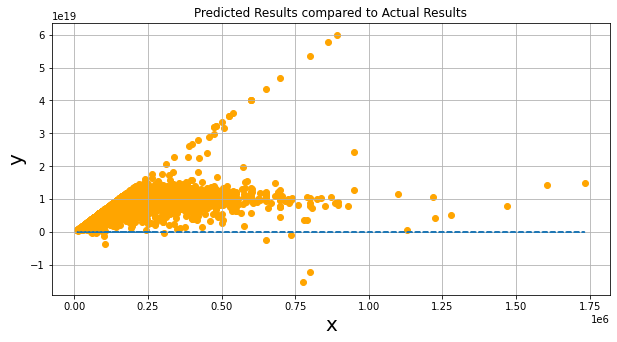

In [92]:
plt.figure(figsize=(10,5))
plt.plot(y_test, y_test, '--')
#plt.scatter(y_test,y_test, c='green')
plt.scatter(y_test, y_hat, c='orange')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Predicted Results compared to Actual Results')
plt.grid('on')
plt.show()

In [93]:
#Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()

In [94]:
neigh.fit(x_train, y_train)

KNeighborsRegressor()

In [95]:
y_hat = neigh.predict(x_test)
y_hat

array([105200., 188400., 200000., ...,  80400., 172400., 269200.])

In [96]:
np.array(y_test) #these are what actually happened for our x_test inputs.

array([105000, 190000, 200000, ...,  81000, 176000, 268000])

In [97]:
#Find MSE
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have
print(mean_squared_error)

909270631.8324995


In [98]:
neigh.score(x_test, y_test)

0.944005943522495

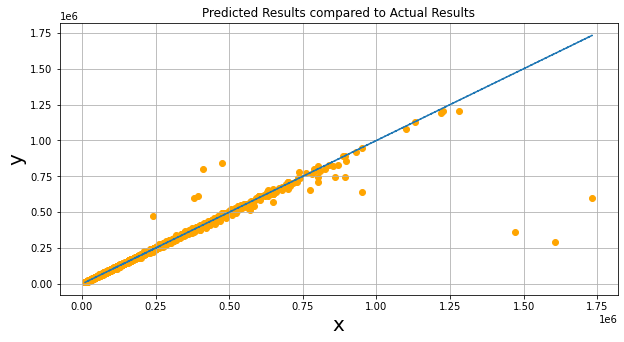

In [99]:
fig = plt.figure(figsize=(10,5))
plt.plot(y_test, y_test, '--')
#plt.scatter(y_test,y_test, c='green')
plt.scatter(y_test, y_hat, c='orange')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Predicted Results compared to Actual Results')
plt.grid('on')
fig.show()

In [101]:
import matplotlib.pyplot as plt, mpld3

In [102]:
mpld3.save_html(fig, 'Nearest_Neighbors_Regression.html')

In [103]:
#Decision Trees Regression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
parameters = {'splitter':('best', 'random'), 'max_depth':[3, 5, 7], 'criterion':('squared_error', 'friedman_mse', 'absolute_error', 'poisson')}
clf = tree.DecisionTreeRegressor()
grid = GridSearchCV(clf, parameters)
grid.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'),
                         'max_depth': [3, 5, 7],
                         'splitter': ('best', 'random')})

In [104]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 7, 'splitter': 'best'}

In [105]:
clf_pred = grid.predict(x_test)

In [106]:
clf.fit(x_train, y_train)

DecisionTreeRegressor()

In [107]:
y_hat = clf.predict(x_test)
y_hat

array([106000., 184000., 200000., ...,  81000., 182000., 270000.])

In [108]:
np.array(y_test) #these are what actually happened for our x_test inputs.

array([105000, 190000, 200000, ...,  81000, 176000, 268000])

In [109]:
#Find MSE
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have
print(mean_squared_error)

2049328201.8817036


In [110]:
clf.score(x_test, y_test)

0.8737997301795112

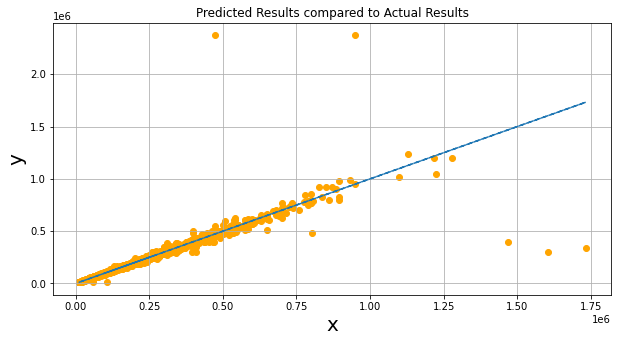

In [111]:
fig = plt.figure(figsize=(10,5))
plt.plot(y_test, y_test, '--')
#plt.scatter(y_test,y_test, c='green')
plt.scatter(y_test, y_hat, c='orange')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Predicted Results compared to Actual Results')
plt.grid('on')
fig.show()

In [112]:
pip install mpld3

Note: you may need to restart the kernel to use updated packages.


In [113]:
mpld3.save_html(fig, 'Decision_Tree_Regression.html')

In [114]:
df.columns

Index(['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany',
       'basesalary', 'stockgrantvalue', 'bonus', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'in_top_15', 'gen_new', 'tit_new', 'sta_new',
       'Female_gender', 'Male_gender', 'Other_Gender', 'CA_state', 'WA_state',
       'Other_state', 'Marketing_title', 'Mechanical Engineer_title',
       'Product Designer_title', 'Recruiter_title', 'Sales_title',
       'Software Engineer_title', 'Software Engineering Manager_title',
       'Solution Architect_title', 'Technical Program Manager_title',
       'Human Resources_title', 'Product Manager_title',
       'Business Analyst_title', 'Management Consultant_title',
       'Data Scientist_title', 'Hardware Engineer_title'],
      dtype='object')